# House Price Prediction using Linear Regression

## Libraries and Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
house = pd.read_excel("HousePricePrediction.xlsx")
print(house.head)

<bound method NDFrame.head of         Id   Area Configuration    Type  Overall Condition  Year Built  \
0        0   8450        Inside    1Fam                  5        2003   
1        1   9600           FR2    1Fam                  8        1976   
2        2  11250        Inside    1Fam                  5        2001   
3        3   9550        Corner    1Fam                  5        1915   
4        4  14260           FR2    1Fam                  5        2000   
...    ...    ...           ...     ...                ...         ...   
2914  2914   1936        Inside   Twnhs                  7        1970   
2915  2915   1894        Inside  TwnhsE                  5        1970   
2916  2916  20000        Inside    1Fam                  7        1960   
2917  2917  10441        Inside    1Fam                  5        1992   
2918  2918   9627        Inside    1Fam                  5        1993   

      Year Renovated Exterior  Sale Price  
0               2003  VinylSd    2085

In [8]:
house.shape

(2919, 9)

In [9]:
obj = (house.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (house.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (house.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 1


## Data Analysis 

C:\Users\HP\AppData\Local\Temp\ipykernel_18852\3361962690.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr(), cmap = 'YlGnBu',fmt = '.5f',linewidths = 3,annot = True)


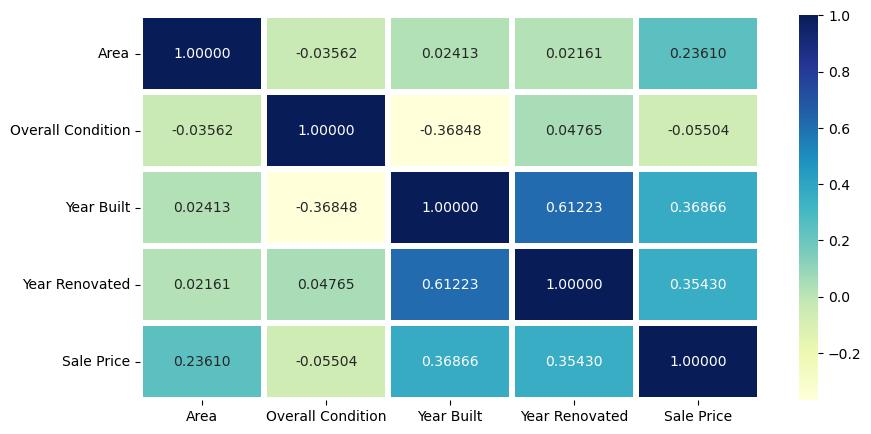

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(house.corr(), cmap = 'YlGnBu',fmt = '.5f',linewidths = 3,annot = True)
plt.show()

<Axes: title={'center': 'Unique values of Categorical Features'}>

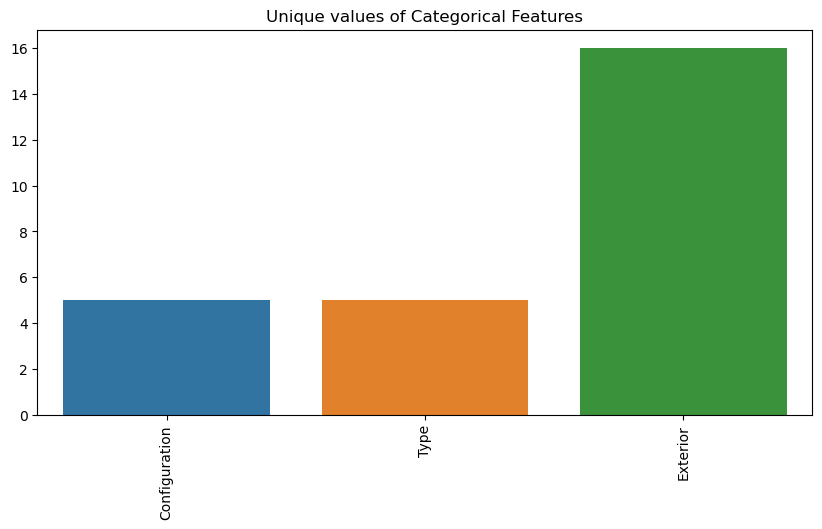

In [11]:
unique_values = []
for col in object_cols:
    unique_values.append(house[col].unique().size)
plt.figure(figsize=(10,5))
plt.title('Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


C:\Users\HP\AppData\Local\Temp\ipykernel_18852\3640204593.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, index)


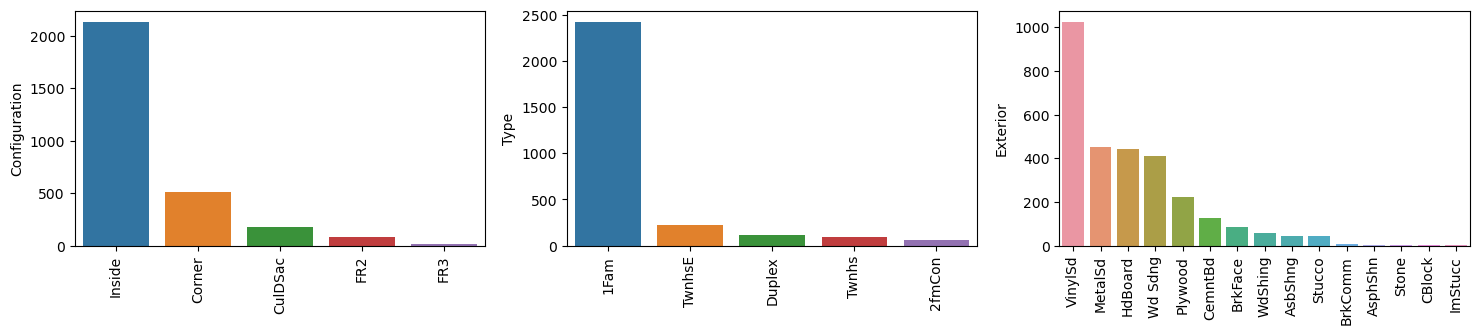

In [12]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = house[col].value_counts()
    plt.subplot(10, 3, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


## Data Cleaning

In [13]:
house.drop(['Id'],axis=1,inplace=True)

In [14]:
house['Sale Price'] = house['Sale Price'].fillna(
house['Sale Price'].mean())

In [15]:
new_house = house.dropna()

In [16]:
new_house.isnull().sum()

Area                 0
Configuration        0
Type                 0
Overall Condition    0
Year Built           0
Year Renovated       0
Exterior             0
Sale Price           0
dtype: int64

## Category Features

In [17]:
from sklearn.preprocessing import OneHotEncoder
s = (new_house.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))


Categorical variables:
['Configuration', 'Type', 'Exterior']
No. of. categorical features:  3


In [18]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_house[object_cols]))
OH_cols.index = new_house.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_house.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


## Splitting Dataset into Training and Testing 

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['Sale Price'], axis=1)
Y = df_final['Sale Price']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


## Model Evaluation

In [20]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1895153545907474


Text(0, 0.5, 'Y_pred')

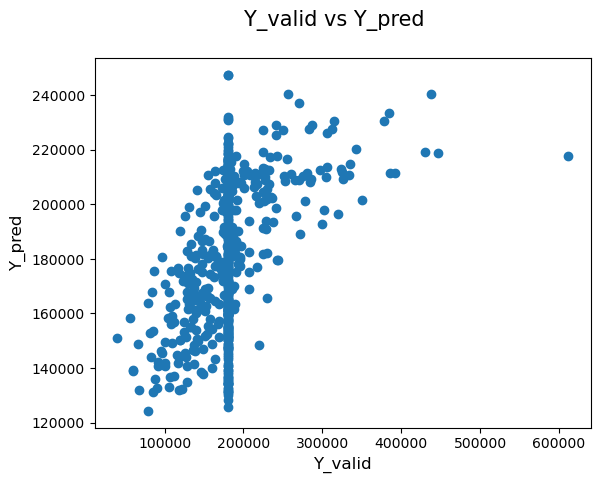

In [21]:
fig = plt.figure()
plt.scatter(Y_valid,Y_pred)
fig.suptitle('Y_valid vs Y_pred', fontsize=15)              
plt.xlabel('Y_valid', fontsize=12)                          
plt.ylabel('Y_pred', fontsize=12)                          

In [22]:
d = house.loc[12]
test_df = pd.DataFrame(data= d)
test_df

,12
Area,12968
Configuration,Inside
Type,1Fam
Overall Condition,6
Year Built,1962
Year Renovated,1962
Exterior,HdBoard
Sale Price,144000.0


In [29]:
Y_pred = model_LR.predict(X_valid)
print('Predicted House Price:', Y_pred[0])
print('Sale Price:',144000.0)

Predicted House Price: 151474.636239195
Sale Price: 144000.0
